In [5]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sys
import spotipy.util as util
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
df = pd.read_csv("top_200_features.csv", sep = ",")

In [3]:
df.head()

,Unnamed: 0,Artist,Position,Streams,Track Name,acousticness,analysis_url,danceability,date,duration_ms,energy,id_caller,id_other,instrumentalness,key,liveness,loudness,mode,region,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,Ed Sheeran,1,51095759,Shape of You,0.5810,https://api.spotify.com/v1/audio-analysis/7qiZ...,0.825,2017-01-06--2017-01-13,233713.0,0.652,7qiZfU4dY1lWllzX7mPBI3,7qiZfU4dY1lWllzX7mPBI3,0.000000,1.0,0.0931,-3.183,0.0,global,0.0802,95.977,4.0,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.9310
1,1,Ed Sheeran,2,35168298,Castle on the Hill,0.0232,https://api.spotify.com/v1/audio-analysis/6PCU...,0.461,2017-01-06--2017-01-13,261154.0,0.834,6PCUP3dWmTjcTtXY02oFdT,6PCUP3dWmTjcTtXY02oFdT,0.000011,2.0,0.1400,-4.868,1.0,global,0.0989,135.007,4.0,https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...,audio_features,spotify:track:6PCUP3dWmTjcTtXY02oFdT,0.4710
2,2,The Weeknd,3,24261229,Starboy,0.1650,https://api.spotify.com/v1/audio-analysis/5aAx...,0.681,2017-01-06--2017-01-13,230453.0,0.594,5aAx2yezTd8zXrkmtKl66Z,5aAx2yezTd8zXrkmtKl66Z,0.000003,7.0,0.1340,-7.028,1.0,global,0.2820,186.054,4.0,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,audio_features,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.5350
3,3,Clean Bandit,4,21671209,Rockabye (feat. Sean Paul & Anne-Marie),0.4060,https://api.spotify.com/v1/audio-analysis/5knu...,0.720,2017-01-06--2017-01-13,251088.0,0.763,5knuzwU65gJK7IF5yJsuaW,5knuzwU65gJK7IF5yJsuaW,0.000000,9.0,0.1800,-4.068,0.0,global,0.0523,101.965,4.0,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,audio_features,spotify:track:5knuzwU65gJK7IF5yJsuaW,0.7420
4,4,ZAYN,5,21513043,I Don’t Wanna Live Forever (Fifty Shades Darke...,0.0631,https://api.spotify.com/v1/audio-analysis/3NdD...,0.735,2017-01-06--2017-01-13,245200.0,0.451,3NdDpSvN911VPGivFlV5d0,3NdDpSvN911VPGivFlV5d0,0.000013,0.0,0.3250,-8.374,1.0,global,0.0585,117.973,4.0,https://api.spotify.com/v1/tracks/3NdDpSvN911V...,audio_features,spotify:track:3NdDpSvN911VPGivFlV5d0,0.0862


In [4]:
df.shape

(27802, 26)

In [5]:
df.dtypes

Unnamed: 0            int64
Artist               object
Position             object
Streams              object
Track Name           object
acousticness        float64
analysis_url         object
danceability        float64
date                 object
duration_ms         float64
energy              float64
id_caller            object
id_other             object
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
region               object
speechiness         float64
tempo               float64
time_signature      float64
track_href           object
type                 object
uri                  object
valence             float64
dtype: object

In [6]:
df.iloc[4000]

Unnamed: 0                4000
Artist                  Artist
Position              Position
Streams                Streams
Track Name          Track Name
acousticness               NaN
analysis_url               NaN
danceability               NaN
date                      date
duration_ms                NaN
energy                     NaN
id_caller                   id
id_other                   NaN
instrumentalness           NaN
key                        NaN
liveness                   NaN
loudness                   NaN
mode                       NaN
region                  region
speechiness                NaN
tempo                      NaN
time_signature             NaN
track_href                 NaN
type                       NaN
uri                        NaN
valence                    NaN
Name: 4000, dtype: object

In [7]:
df["Streams"] = df["Streams"].replace("Streams", 0)

In [8]:
df["Streams"] = pd.to_numeric(df["Streams"])

In [9]:
df["date"]

0        2017-01-06--2017-01-13
1        2017-01-06--2017-01-13
2        2017-01-06--2017-01-13
3        2017-01-06--2017-01-13
4        2017-01-06--2017-01-13
                  ...          
27797    2019-09-13--2019-09-20
27798    2019-09-13--2019-09-20
27799    2019-09-13--2019-09-20
27800    2019-09-13--2019-09-20
27801    2019-09-13--2019-09-20
Name: date, Length: 27802, dtype: object

In [10]:
df["Artist"] = df["Artist"].fillna("Missing")


In [11]:
df["Artist"].isna().sum()

0

In [12]:
df.dtypes

Unnamed: 0            int64
Artist               object
Position             object
Streams               int64
Track Name           object
acousticness        float64
analysis_url         object
danceability        float64
date                 object
duration_ms         float64
energy              float64
id_caller            object
id_other             object
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
region               object
speechiness         float64
tempo               float64
time_signature      float64
track_href           object
type                 object
uri                  object
valence             float64
dtype: object

In [13]:
df.isna().sum()

Unnamed: 0          0
Artist              0
Position            0
Streams             0
Track Name          5
acousticness        2
analysis_url        2
danceability        2
date                0
duration_ms         2
energy              2
id_caller           0
id_other            2
instrumentalness    2
key                 2
liveness            2
loudness            2
mode                2
region              0
speechiness         2
tempo               2
time_signature      2
track_href          2
type                2
uri                 2
valence             2
dtype: int64

In [14]:
df["date"] = df["date"].str.slice(start = 0, stop = 10)

In [15]:
df["Track Name"] = df["Track Name"].fillna("Missing")

In [16]:
df["acousticness"] = df["acousticness"].fillna(df["acousticness"].mean())

In [17]:
df["danceability"] = df["danceability"].fillna(df["danceability"].mean())

In [18]:
df["energy"] = df["energy"].fillna(df["energy"].mean())

In [19]:
df["instrumentalness"] = df["instrumentalness"].fillna(df["instrumentalness"].mean())

In [20]:
df["loudness"] = df["loudness"].fillna(df["loudness"].mean())

In [21]:
df["tempo"] = df["tempo"].fillna(df["tempo"].mean())

In [22]:
df.isna().sum()

Unnamed: 0          0
Artist              0
Position            0
Streams             0
Track Name          0
acousticness        0
analysis_url        2
danceability        0
date                0
duration_ms         2
energy              0
id_caller           0
id_other            2
instrumentalness    0
key                 2
liveness            2
loudness            0
mode                2
region              0
speechiness         2
tempo               0
time_signature      2
track_href          2
type                2
uri                 2
valence             2
dtype: int64

In [23]:
df.shape

(27802, 26)

In [24]:
df.head()

,Unnamed: 0,Artist,Position,Streams,Track Name,acousticness,analysis_url,danceability,date,duration_ms,energy,id_caller,id_other,instrumentalness,key,liveness,loudness,mode,region,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,Ed Sheeran,1,51095759,Shape of You,0.5810,https://api.spotify.com/v1/audio-analysis/7qiZ...,0.825,2017-01-06,233713.0,0.652,7qiZfU4dY1lWllzX7mPBI3,7qiZfU4dY1lWllzX7mPBI3,0.000000,1.0,0.0931,-3.183,0.0,global,0.0802,95.977,4.0,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.9310
1,1,Ed Sheeran,2,35168298,Castle on the Hill,0.0232,https://api.spotify.com/v1/audio-analysis/6PCU...,0.461,2017-01-06,261154.0,0.834,6PCUP3dWmTjcTtXY02oFdT,6PCUP3dWmTjcTtXY02oFdT,0.000011,2.0,0.1400,-4.868,1.0,global,0.0989,135.007,4.0,https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...,audio_features,spotify:track:6PCUP3dWmTjcTtXY02oFdT,0.4710
2,2,The Weeknd,3,24261229,Starboy,0.1650,https://api.spotify.com/v1/audio-analysis/5aAx...,0.681,2017-01-06,230453.0,0.594,5aAx2yezTd8zXrkmtKl66Z,5aAx2yezTd8zXrkmtKl66Z,0.000003,7.0,0.1340,-7.028,1.0,global,0.2820,186.054,4.0,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,audio_features,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.5350
3,3,Clean Bandit,4,21671209,Rockabye (feat. Sean Paul & Anne-Marie),0.4060,https://api.spotify.com/v1/audio-analysis/5knu...,0.720,2017-01-06,251088.0,0.763,5knuzwU65gJK7IF5yJsuaW,5knuzwU65gJK7IF5yJsuaW,0.000000,9.0,0.1800,-4.068,0.0,global,0.0523,101.965,4.0,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,audio_features,spotify:track:5knuzwU65gJK7IF5yJsuaW,0.7420
4,4,ZAYN,5,21513043,I Don’t Wanna Live Forever (Fifty Shades Darke...,0.0631,https://api.spotify.com/v1/audio-analysis/3NdD...,0.735,2017-01-06,245200.0,0.451,3NdDpSvN911VPGivFlV5d0,3NdDpSvN911VPGivFlV5d0,0.000013,0.0,0.3250,-8.374,1.0,global,0.0585,117.973,4.0,https://api.spotify.com/v1/tracks/3NdDpSvN911V...,audio_features,spotify:track:3NdDpSvN911VPGivFlV5d0,0.0862


In [25]:
df.isna().sum()

Unnamed: 0          0
Artist              0
Position            0
Streams             0
Track Name          0
acousticness        0
analysis_url        2
danceability        0
date                0
duration_ms         2
energy              0
id_caller           0
id_other            2
instrumentalness    0
key                 2
liveness            2
loudness            0
mode                2
region              0
speechiness         2
tempo               0
time_signature      2
track_href          2
type                2
uri                 2
valence             2
dtype: int64

In [26]:
df.describe()

,Unnamed: 0,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,27802.000000,2.780200e+04,27802.000000,27802.000000,27800.000000,27802.000000,27802.000000,27800.000000,27800.000000,27802.000000,27800.000000,27800.000000,27802.000000,27800.000000,27800.000000
mean,13900.500000,7.996526e+06,0.213715,0.700417,211314.294964,0.643344,0.006624,5.284928,0.165276,-6.006076,0.597446,0.115882,119.886959,3.979640,0.492687
std,8025.890428,5.721296e+06,0.221088,0.129692,40494.012153,0.158085,0.046145,3.691258,0.118551,2.306930,0.490421,0.102776,29.249101,0.194392,0.215668
min,0.000000,0.000000e+00,0.000031,0.153000,35240.000000,0.027900,0.000000,0.000000,0.021500,-34.475000,0.000000,0.023200,46.718000,1.000000,0.037000
25%,6950.250000,4.595654e+06,0.043725,0.624000,188174.000000,0.538000,0.000000,1.000000,0.094400,-7.114000,0.000000,0.046400,96.053000,4.000000,0.329000
50%,13900.500000,5.957886e+06,0.139000,0.717000,208080.000000,0.657000,0.000000,5.000000,0.121000,-5.667000,1.000000,0.072600,114.965000,4.000000,0.487000
75%,20850.750000,9.294003e+06,0.307000,0.789000,230453.000000,0.768000,0.000015,8.000000,0.190000,-4.407000,1.000000,0.144000,139.999000,4.000000,0.661000
max,27801.000000,7.146787e+07,0.994000,0.974000,577199.000000,0.978000,0.918000,11.000000,0.955000,0.175000,1.000000,0.966000,212.117000,5.000000,0.982000


In [27]:
df.head()

,Unnamed: 0,Artist,Position,Streams,Track Name,acousticness,analysis_url,danceability,date,duration_ms,energy,id_caller,id_other,instrumentalness,key,liveness,loudness,mode,region,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,Ed Sheeran,1,51095759,Shape of You,0.5810,https://api.spotify.com/v1/audio-analysis/7qiZ...,0.825,2017-01-06,233713.0,0.652,7qiZfU4dY1lWllzX7mPBI3,7qiZfU4dY1lWllzX7mPBI3,0.000000,1.0,0.0931,-3.183,0.0,global,0.0802,95.977,4.0,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,audio_features,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.9310
1,1,Ed Sheeran,2,35168298,Castle on the Hill,0.0232,https://api.spotify.com/v1/audio-analysis/6PCU...,0.461,2017-01-06,261154.0,0.834,6PCUP3dWmTjcTtXY02oFdT,6PCUP3dWmTjcTtXY02oFdT,0.000011,2.0,0.1400,-4.868,1.0,global,0.0989,135.007,4.0,https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...,audio_features,spotify:track:6PCUP3dWmTjcTtXY02oFdT,0.4710
2,2,The Weeknd,3,24261229,Starboy,0.1650,https://api.spotify.com/v1/audio-analysis/5aAx...,0.681,2017-01-06,230453.0,0.594,5aAx2yezTd8zXrkmtKl66Z,5aAx2yezTd8zXrkmtKl66Z,0.000003,7.0,0.1340,-7.028,1.0,global,0.2820,186.054,4.0,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,audio_features,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.5350
3,3,Clean Bandit,4,21671209,Rockabye (feat. Sean Paul & Anne-Marie),0.4060,https://api.spotify.com/v1/audio-analysis/5knu...,0.720,2017-01-06,251088.0,0.763,5knuzwU65gJK7IF5yJsuaW,5knuzwU65gJK7IF5yJsuaW,0.000000,9.0,0.1800,-4.068,0.0,global,0.0523,101.965,4.0,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,audio_features,spotify:track:5knuzwU65gJK7IF5yJsuaW,0.7420
4,4,ZAYN,5,21513043,I Don’t Wanna Live Forever (Fifty Shades Darke...,0.0631,https://api.spotify.com/v1/audio-analysis/3NdD...,0.735,2017-01-06,245200.0,0.451,3NdDpSvN911VPGivFlV5d0,3NdDpSvN911VPGivFlV5d0,0.000013,0.0,0.3250,-8.374,1.0,global,0.0585,117.973,4.0,https://api.spotify.com/v1/tracks/3NdDpSvN911V...,audio_features,spotify:track:3NdDpSvN911VPGivFlV5d0,0.0862


In [28]:
df["Streams"]

0        51095759
1        35168298
2        24261229
3        21671209
4        21513043
           ...   
27797     4440675
27798     4425342
27799     4408380
27800     4405555
27801     4397008
Name: Streams, Length: 27802, dtype: int64

In [29]:
df.dtypes

Unnamed: 0            int64
Artist               object
Position             object
Streams               int64
Track Name           object
acousticness        float64
analysis_url         object
danceability        float64
date                 object
duration_ms         float64
energy              float64
id_caller            object
id_other             object
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
region               object
speechiness         float64
tempo               float64
time_signature      float64
track_href           object
type                 object
uri                  object
valence             float64
dtype: object

In [30]:
df["Streams"].sum()

222319412779

In [31]:
df["Streams"] = df["Streams"].replace(0, int(df["Streams"].mean()))

In [32]:
df["Streams"].sum()

222327409304

In [33]:
df.groupby("Artist").sum().sort_values(by="Streams", ascending=False).head(20)

,Unnamed: 0,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
Artist,,,,,,,,,,,,,,,
Post Malone,14053794,9704924114,253.324700,571.474,183546566.0,522.2690,0.939129,5437.0,123.4010,-5079.943,578.0,65.0244,113142.840,3458.0,323.8010
Ed Sheeran,12035973,8725161273,389.223575,646.654,232897502.0,514.4624,0.094115,4095.0,136.9314,-6125.995,756.0,56.6843,96867.644,3672.0,483.2830
Drake,8173623,7017428935,75.899890,555.336,155497553.0,383.4280,9.135399,4123.0,177.6994,-5735.320,539.0,102.7541,78416.759,2844.0,273.2250
XXXTENTACION,11634330,5667883012,320.913934,545.466,95778438.0,356.2866,14.048819,3611.0,102.6066,-5567.429,265.0,96.4592,84857.909,2849.0,321.4983
Ariana Grande,7472190,5047953891,71.624680,279.780,84275609.0,252.6710,0.387988,2007.0,76.6626,-2583.368,230.0,51.2654,52518.991,1652.0,167.6059
Billie Eilish,10632865,4476522604,324.849000,267.618,93508032.0,157.0226,29.841569,2178.0,82.7452,-5298.072,242.0,65.8975,58429.582,1777.0,121.2370
The Chainsmokers,6974924,4087662655,91.624460,344.414,122792384.0,342.4630,0.262566,3856.0,82.7277,-3508.306,366.0,27.8242,59886.406,2148.0,253.0840
Khalid,6562690,3413321903,86.793700,280.422,84686825.0,209.7360,24.089803,1052.0,50.6393,-3310.196,233.0,57.7712,45785.854,1584.0,128.3893
Imagine Dragons,6412801,3182826945,24.569947,267.341,83341373.0,305.1770,18.990885,1759.0,59.2225,-2081.211,266.0,29.2410,57797.058,1646.0,176.1545


In [34]:
df2 = df.groupby("Artist").sum().sort_values(by="Streams", ascending=False).head(20)

In [35]:
df["Artist"].value_counts()

Ed Sheeran                969
Post Malone               864
XXXTENTACION              712
Drake                     708
The Chainsmokers          543
                         ... 
Trío Los Josefinos          1
Stan Kenton                 1
Thirty Seconds To Mars      1
Tom Petty                   1
Peter Manos                 1
Name: Artist, Length: 619, dtype: int64

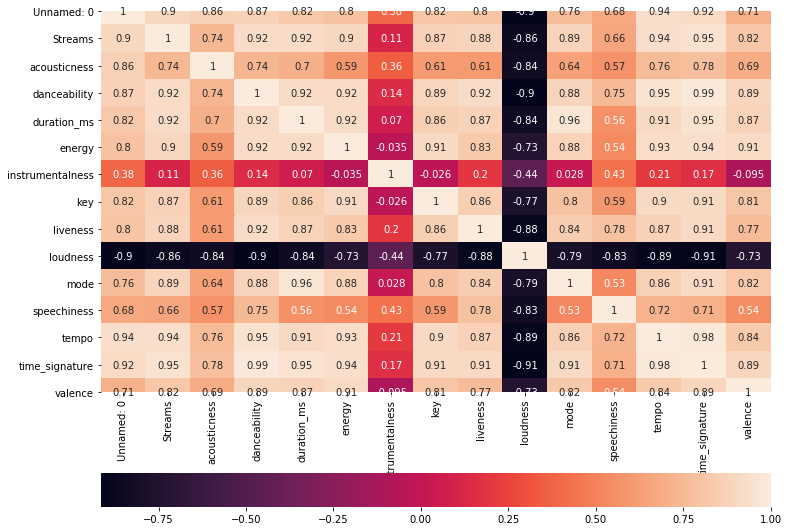

In [36]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df2.corr(), annot = True,  cbar_kws= {"orientation": "horizontal"});

In [37]:
streams_atri = sm.OLS(df["Streams"],
df[["acousticness","danceability", "energy", "instrumentalness", "loudness", "tempo"]]).fit()

In [48]:
streams_atri.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Streams   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                              8880.
Date:                Wed, 04 Mar 2020   Prob (F-statistic):                        0.00
Time:                        13:42:08   Log-Likelihood:                     -4.7221e+05
No. Observations:               27802   AIC:                                  9.444e+05
Df Residuals:                   27796   BIC:                                  9.445e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness      1.446e+06   1.69e+05      8.578      0.000    1.12e+06    1.78e+06
danceability       5.82e+06   2.24e+05     25.971      0.000    5.38e+06    6.26e+06
energy             3.19e+06   2.17e+05     14.670      0.000    2.76e+06    3.62e+06
instrumentalness -5.647e+04   7.55e+05     -0.075      0.940   -1.54e+06    1.42e+06
loudness         -1.451e+05   1.66e+04     -8.766      0.000   -1.78e+05   -1.13e+05
tempo             5215.0305   1123.205      4.643      0.000    3013.493    7416.568
==============================================================================
Omnibus:                    17986.405   Durbin-Watson:                   0.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           258974.027
Skew:                           2.937   Prob(JB):                         0.00
Kurtosis:                      16.749   Cond. No.                     2.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
features = df.select_dtypes(include=["float64"])

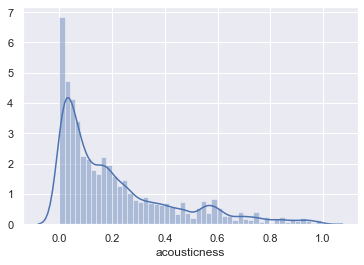

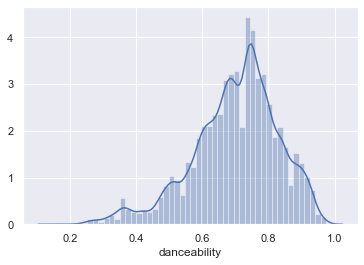

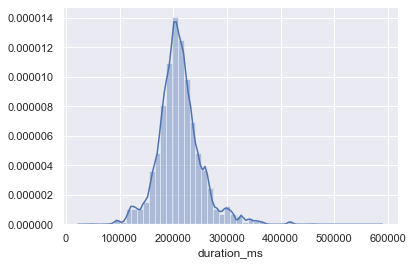

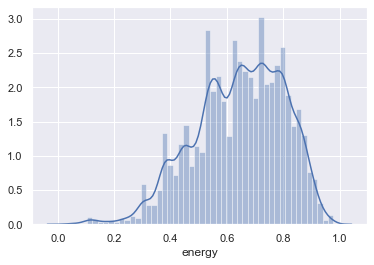

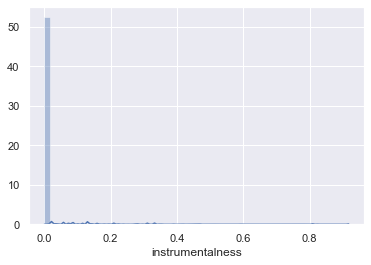

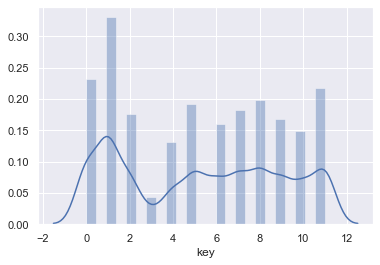

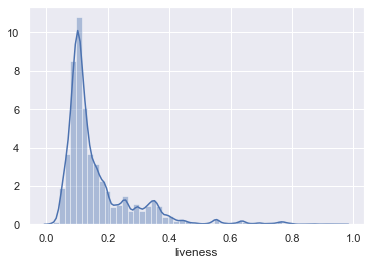

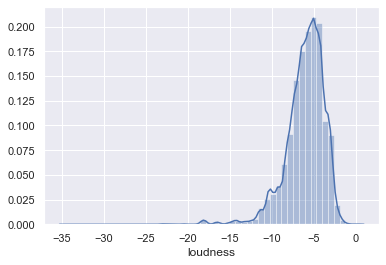

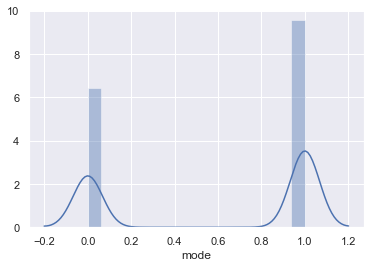

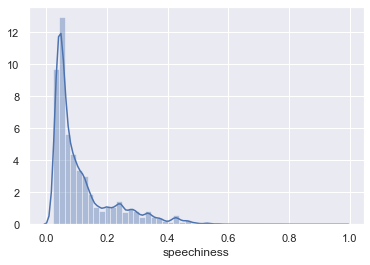

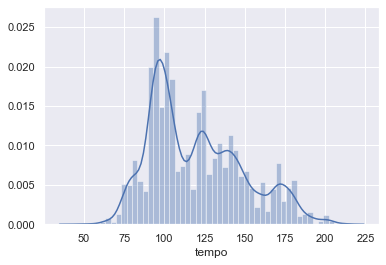

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

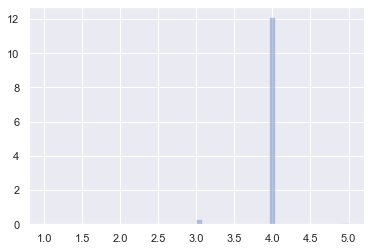

In [50]:
sns.set()
for feature in features.columns:
    sns.distplot(df[feature])
    plt.show()

In [ ]:
#df.to_csv("Top_Streams.csv")

Concatinting dateframes from different countries

In [ ]:
countries_list = ["ar", "at", "au", "be", "bg", "bo", "br", "ca", "ch", "cl", "co", "cr", "cy", "cz", "de", "dk", "do", "ec", "ee", "es", "fi", "fr", "gb", "gr", "gt", "hk", "hn", "hu", "id", "ie", "is", "it", "lt", "lu", "lv", "mt", "mx", "my", "ni", "nl", "no", "nz", "pa","pe", "ph", "pl", "pt", "py", "se", "sg", "sk", "sv", "tr", "tw", "us", "uy"] 

In [ ]:
combined_country_csv = pd.concat([pd.read_csv(f"{i}-top_200_weekly.csv") for i in countries_list])
    

In [ ]:
combined_country_csv.to_csv( "combined_country_csv.csv", index=False, encoding='utf-8-sig')

In [ ]:
dfcountries = pd.read_csv("combined_country_csv.csv", sep = ",")

In [ ]:
dfcountries.shape

In [ ]:
dfcountries.head()

In [ ]:
dfcountries["region"] = dfcountries["region"].replace({"ar": "argentina", "at": "austria", "au":"australia", "be":"belgium", "bg":"bulgaria", "bo":"bolivia", "br":"brazil", "ca":"canada", "ch":"switzerland", "cl":"chile", "co":"colombia", "cr":"costa rica", "cy":"cyprus", "cz":"czech republic", "de":"germany", "dk":"denmark", "do":"dominican republic", "ec":"ecuador", "ee":"estonia", "es":"spain", "fi":"finland", "fr":"france", "gb":"united kingdom", "gr":"grece", "gt":"guatemala", "hk":"hong kong", "hn":"honduras", "hu":"hungary", "id":"indonesia", "ie":"ireland", "is":"israel", "it":"italy", "lt":"lithuania", "lu":"luxemburg", "lv":"latvia", "mt":"malta", "mx":"mexico", "my":"malaysia", "ni":"nicaragua", "nl":"netherlands", "no":"norway", "nz":"new zealand", "pa":"panama","pe":"peru", "ph":"philippines", "pl":"poland", "pt":"portugal", "py":"paraguay", "se":"sweden", "sg":"sigapore", "sk":"slovakia", "sv":"el salvador", "tr":"turkey", "tw":"taiwan", "us":"united states", "uy":"uruguay"})

In [ ]:
dfcountries.to_csv("all_countries.csv", index=False)

In [ ]:
dfcountries.head()

In [ ]:
dfcountries["Artist"].value_counts()

In [ ]:
dfstreams = dfcountries.groupby(['Artist']).sum().sort_values(by=['Streams'], ascending=False)

In [ ]:
dfstreams.head()

In [ ]:
dfstreams.head()["Streams"].sum()/dfcountries["Streams"].sum()

In [ ]:
dfcountries["Streams"].sum()

In [ ]:
dfstreams.head(2)["Streams"].sum()

In [ ]:
dfcountries.loc[dfcountries["Artist"] == "Post Malone"].groupby(['Track Name']).sum()

In [ ]:
len(dfcountries.loc[dfcountries["Artist"] == "Post Malone"].groupby(['Track Name']).sum())

In [ ]:
dfcountries.loc[dfcountries["Artist"] == "Ed Sheeran"].groupby(['Track Name']).sum()

In [57]:
len(dfcountries.loc[dfcountries["Artist"] == "Ed Sheeran"].groupby(['Track Name']).sum())

NameError: name 'dfcountries' is not defined

# Connecting api


In [55]:
scope = "user-library-read"

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print ("Usage: %s username" % (sys.argv[0],))
    sys.exit()
token = util.prompt_for_user_token(username,scope,client_id='5fb26683a2864d5e8d1c1e8840cf2128',
                                  client_secret='926dc94a537c4bb0b02684179d6cc6a8', redirect_uri="http://localhost/")

In [56]:
sp = spotipy.Spotify(auth=token)

In [ ]:
len(list(dfcountries["spotify_id"].value_counts().to_frame().index))

In [ ]:
features =[]
for i in list(list(dfcountries["spotify_id"].value_counts().to_frame().index)):
    track_id = i #chosen artist
    result = sp.audio_features(track_id) #search query
    features.append(result)

In [ ]:
a =[]
for i in features:
    a.append(i[0])

In [ ]:
len(features)

In [ ]:
len(features)

In [ ]:
features_backup = features.copy()

In [ ]:
a.remove(a[40403])

In [ ]:
featurescountries = pd.DataFrame(a)

In [ ]:
featurescountries.head()

In [ ]:
dfcountries.head()

In [ ]:
df_countries_features = dfcountries.merge(featurescountries, left_on='spotify_id', right_on='id')

In [ ]:
df_countries_features.head()

In [ ]:
df_countries_features = df_countries_features.sort_values(by=['region', 'date', "Streams"], ascending=False)

In [ ]:
df_countries_features.to_csv('countries_features.csv')  

In [ ]:
df_countries_features[["Artist","id"]].groupby("Artist").max().sort_values(by=["Artist"], ascending=True)["id"].values

In [ ]:
for i in df_countries_features[["Artist","id"]].groupby("Artist").max().sort_values(by=["Artist"], ascending=True)["id"].values:
    print(i)

# getting genre


In [82]:
artist =[]
for i in df_countries_features[["Artist","id"]].groupby("Artist").max().sort_values(by=["Artist"], ascending=True)["id"].values:
    artist_id = i #chosen artist
    result = sp.track(artist_id) #search query
    artist.append(result["album"]["artists"][0]["id"])

retrying ...1secs
retrying ...2secs
retrying ...5secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...3secs
retrying ...2secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...3secs
retrying ...5secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...3secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...2secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...5secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...5secs
retrying ...5secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...5secs
retrying ...4secs
retrying .

In [83]:
artist[:10]

['4PdggFNYwGfjRfkdG5OfES',
 '20tEOuLV0x6pbG9ZNJP0cZ',
 '1uUuCEXmWpKN2YLl5xSoT2',
 '4LSxzEEvq6j0v4W2P013xn',
 '0lxgPYvUjEApUKpZmr61IE',
 '1VPmR4DJC1PlOtd0IADAO0',
 '2AfmfGFbe0A0WsTYm0SDTx',
 '6Ff53KvcvAj5U7Z1vojB5o',
 '7Gy1PxqrgsiqWF6JNYPHeB',
 '07Hm9w6ksRaggaDBpN8RRd']

In [84]:
genre =[]
for i in artist:
    artist_id = i #chosen artist
    result = sp.artist(artist_id) #search query
    if len(result["genres"]) == 0:
        genre.append("")
    else:
        genre.append(result["genres"][0])

retrying ...2secs
retrying ...4secs
retrying ...1secs
retrying ...3secs
retrying ...3secs
retrying ...5secs
retrying ...4secs
retrying ...2secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...5secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...5secs
retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...2secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...5secs
retrying ...4secs
retrying ...4secs
retrying ...4secs
retrying .

In [85]:
genre[:10]

['cumbia pop',
 '',
 'dutch hip hop',
 'icelandic hip hop',
 'trap espanol',
 'dark trap',
 'k-pop',
 'boy band',
 'indonesian indie',
 'argentine hip hop']

In [86]:
df_countries_features[["Artist","id"]].groupby("Artist").max().sort_values(by=["Artist"], ascending=True).head(10)

,id
Artist,
#TocoParaVos,7zW4IqrzU6dTLw3CM72Qbo
$hea Butta,46kRQmlr15vOLyIjCQoxF2
$hirak,77wz2VtAwxAwYOGTJrZBKT
$igmund,0Cn8IZuVnlhZyp8yh9vOr8
$kyhook,7754vHc34U2wQMIJFWRhVK
$uicideBoy$,7wPHEEGn0rWMZEDrDcOaDa
(G)I-DLE,7gr57cYekMWriyJYbT7oZ4
*NSYNC,46n2EGFnPC3tzWCN1Aqe26
.Feast,5vyvUHRYcvFx6aINr6xDpr


In [87]:
df_artist_genre = df_countries_features[["Artist","id"]].groupby("Artist").max().sort_values(by=["Artist"], ascending=True)

In [88]:
df_artist_genre.assign(genre = genre)

,id,genre
Artist,,
#TocoParaVos,7zW4IqrzU6dTLw3CM72Qbo,cumbia pop
$hea Butta,46kRQmlr15vOLyIjCQoxF2,
$hirak,77wz2VtAwxAwYOGTJrZBKT,dutch hip hop
$igmund,0Cn8IZuVnlhZyp8yh9vOr8,icelandic hip hop
$kyhook,7754vHc34U2wQMIJFWRhVK,trap espanol
...,...,...
魏奇奇,5ujzXla4Duu88FPpfJM9xB,
鳥屎,30SOtlJHIX1zGt3Nch0TYr,taiwan hip hop
黃奕儒Ezu,7wrrALdujUJ4yDI4KCoeXw,taiwan pop


In [89]:
df_artist_genre = df_artist_genre.assign(genre = genre)

In [90]:
df_artist_genre = df_artist_genre.drop(columns="id")

In [91]:
df_countries_features_genre = df_countries_features.merge(df_artist_genre, left_on='Artist', right_on='Artist')

In [92]:
df_countries_features_genre = df_countries_features_genre.sort_values(by=['region', 'date', "Streams"], ascending=False)

In [96]:
df_countries_features_genre.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,date,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,793488,1,Tusa,KAROL G,172770,2019-12-20--2019-12-27,uruguay,7k4t7uLgtOxPwTpFmtJNTY,0.803,0.715,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,audio_features,7k4t7uLgtOxPwTpFmtJNTY,spotify:track:7k4t7uLgtOxPwTpFmtJNTY,https://api.spotify.com/v1/tracks/7k4t7uLgtOxP...,https://api.spotify.com/v1/audio-analysis/7k4t...,200960,4,latin
6327,788402,2,RITMO (Bad Boys For Life),Black Eyed Peas,114119,2019-12-20--2019-12-27,uruguay,6cy3ki60hLwimwIje7tALf,0.721,0.716,10,-7.037,0,0.0657,0.0334,0.000840,0.2370,0.667,104.994,audio_features,6cy3ki60hLwimwIje7tALf,spotify:track:6cy3ki60hLwimwIje7tALf,https://api.spotify.com/v1/tracks/6cy3ki60hLwi...,https://api.spotify.com/v1/audio-analysis/6cy3...,221714,4,dance pop
6839,780397,3,Fantasias,Rauw Alejandro,108214,2019-12-20--2019-12-27,uruguay,6mAN61JH0dzyZpWslS11jy,0.879,0.703,1,-4.219,1,0.0701,0.1430,0.000000,0.0569,0.788,94.004,audio_features,6mAN61JH0dzyZpWslS11jy,spotify:track:6mAN61JH0dzyZpWslS11jy,https://api.spotify.com/v1/tracks/6mAN61JH0dzy...,https://api.spotify.com/v1/audio-analysis/6mAN...,199711,4,latin
8399,793024,4,Hola - Remix,Dalex,100958,2019-12-20--2019-12-27,uruguay,5stPVcRqb4qixbafP9e8lt,0.654,0.672,0,-5.980,0,0.3110,0.4710,0.000000,0.0781,0.343,181.857,audio_features,5stPVcRqb4qixbafP9e8lt,spotify:track:5stPVcRqb4qixbafP9e8lt,https://api.spotify.com/v1/tracks/5stPVcRqb4qi...,https://api.spotify.com/v1/audio-analysis/5stP...,249520,4,r&b en espanol
10491,789471,5,Que Tire Pa Lante,Daddy Yankee,100260,2019-12-20--2019-12-27,uruguay,6RyaV7owmVU6fzEPE17sF1,0.658,0.901,7,-2.814,1,0.0357,0.0478,0.000000,0.1200,0.708,93.979,audio_features,6RyaV7owmVU6fzEPE17sF1,spotify:track:6RyaV7owmVU6fzEPE17sF1,https://api.spotify.com/v1/tracks/6RyaV7owmVU6...,https://api.spotify.com/v1/audio-analysis/6Rya...,210520,4,latin


In [98]:
df_countries_features_genre["date"] = df_countries_features_genre["date"].str.slice(start = 0, stop = 10)

In [100]:
df_countries_features_genre.tail()

,Unnamed: 0,Position,Track Name,Artist,Streams,date,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
341366,141249,196,La noche,Andrés Calamaro,85026,2017-01-06,argentina,1zI2cbdyNRPNQJONGMtHj2,0.574,0.853,7,-6.322,1,0.0437,0.0303,0.000000,0.3360,0.891,95.999,audio_features,1zI2cbdyNRPNQJONGMtHj2,spotify:track:1zI2cbdyNRPNQJONGMtHj2,https://api.spotify.com/v1/tracks/1zI2cbdyNRPN...,https://api.spotify.com/v1/audio-analysis/1zI2...,221913,4,argentine rock
678639,141250,197,Una en un Millón - Remix,Alexis y Fido,84796,2017-01-06,argentina,2BesEfIHzUb7viZwUkSAhE,0.792,0.822,4,-2.825,0,0.0512,0.5250,0.000000,0.1320,0.773,95.021,audio_features,2BesEfIHzUb7viZwUkSAhE,spotify:track:2BesEfIHzUb7viZwUkSAhE,https://api.spotify.com/v1/tracks/2BesEfIHzUb7...,https://api.spotify.com/v1/audio-analysis/2Bes...,207024,4,latin
1109584,141272,198,Chica Brasileña,El Super Hobby,84767,2017-01-06,argentina,5gwCA6eUUqFNg5VVWo2Yzo,0.599,0.794,9,-4.277,0,0.0645,0.6060,0.000000,0.0602,0.971,140.561,audio_features,5gwCA6eUUqFNg5VVWo2Yzo,spotify:track:5gwCA6eUUqFNg5VVWo2Yzo,https://api.spotify.com/v1/tracks/5gwCA6eUUqFN...,https://api.spotify.com/v1/audio-analysis/5gwC...,147960,3,cumbia paraguaya
129405,141283,199,El Pecado,Ozuna,84208,2017-01-06,argentina,5waUXf92wjHTSOmSQz02W4,0.740,0.645,0,-6.604,1,0.1370,0.5070,0.000002,0.2110,0.457,124.943,audio_features,5waUXf92wjHTSOmSQz02W4,spotify:track:5waUXf92wjHTSOmSQz02W4,https://api.spotify.com/v1/tracks/5waUXf92wjHT...,https://api.spotify.com/v1/audio-analysis/5waU...,249652,4,latin
1227430,141327,200,No Money,Galantis,84132,2017-01-06,argentina,0gb1J5UrTpzaU1s3nupgCd,0.671,0.916,6,-4.014,0,0.0397,0.0282,0.007620,0.2400,0.803,126.010,audio_features,0gb1J5UrTpzaU1s3nupgCd,spotify:track:0gb1J5UrTpzaU1s3nupgCd,https://api.spotify.com/v1/tracks/0gb1J5UrTpza...,https://api.spotify.com/v1/audio-analysis/0gb1...,189127,4,big room


In [101]:
df_countries_features_genre.to_csv('countries_features_genre.csv') 

In [102]:
df_countries_features_genre.to_csv('countries_features_genre_backup.csv') 

In [ ]:
df.head()

In [ ]:
df_global = df.merge(df_artist_genre, left_on='Artist', right_on='Artist')

In [ ]:
df_global = df_global.sort_values(by=['date', "Streams"], ascending=False)

In [ ]:
df_global.head(300)

In [ ]:
df_global.to_csv('global.csv') 

# Assingning the right genre to top artists


In [18]:
df_countries_features_genre = pd.read_csv("countries_features_genre.csv", sep = ",")

In [19]:
df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Post Malone"] = df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Post Malone"].replace("dfw rap" , "hip hop")

In [20]:
df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Drake"]

,Unnamed: 0,Unnamed: 0.1,Position,Track Name,Artist,Streams,date,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
11799,706020,559675,200,In My Feelings,Drake,9414,2018-11-09,uruguay,2G7V7zsVDxg1yRsu7Ew9RJ,0.835,0.626,1,-5.833,1,0.1250,0.05890,0.000060,0.396,0.350,91.030,audio_features,2G7V7zsVDxg1yRsu7Ew9RJ,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,https://api.spotify.com/v1/audio-analysis/2G7V...,217925,4,canadian hip hop
11973,706021,559674,174,In My Feelings,Drake,10657,2018-11-02,uruguay,2G7V7zsVDxg1yRsu7Ew9RJ,0.835,0.626,1,-5.833,1,0.1250,0.05890,0.000060,0.396,0.350,91.030,audio_features,2G7V7zsVDxg1yRsu7Ew9RJ,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,https://api.spotify.com/v1/audio-analysis/2G7V...,217925,4,canadian hip hop
12141,706022,559673,142,In My Feelings,Drake,11696,2018-10-26,uruguay,2G7V7zsVDxg1yRsu7Ew9RJ,0.835,0.626,1,-5.833,1,0.1250,0.05890,0.000060,0.396,0.350,91.030,audio_features,2G7V7zsVDxg1yRsu7Ew9RJ,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,https://api.spotify.com/v1/audio-analysis/2G7V...,217925,4,canadian hip hop
12321,706023,559672,122,In My Feelings,Drake,12484,2018-10-19,uruguay,2G7V7zsVDxg1yRsu7Ew9RJ,0.835,0.626,1,-5.833,1,0.1250,0.05890,0.000060,0.396,0.350,91.030,audio_features,2G7V7zsVDxg1yRsu7Ew9RJ,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,https://api.spotify.com/v1/audio-analysis/2G7V...,217925,4,canadian hip hop
12498,706024,559671,99,In My Feelings,Drake,14567,2018-10-12,uruguay,2G7V7zsVDxg1yRsu7Ew9RJ,0.835,0.626,1,-5.833,1,0.1250,0.05890,0.000060,0.396,0.350,91.030,audio_features,2G7V7zsVDxg1yRsu7Ew9RJ,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,https://api.spotify.com/v1/audio-analysis/2G7V...,217925,4,canadian hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727130,727205,61664,56,One Dance,Drake,216111,2017-01-13,argentina,1xznGGDReH1oQq0xzbwXa3,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.004230,0.351,0.371,103.989,audio_features,1xznGGDReH1oQq0xzbwXa3,spotify:track:1xznGGDReH1oQq0xzbwXa3,https://api.spotify.com/v1/tracks/1xznGGDReH1o...,https://api.spotify.com/v1/audio-analysis/1xzn...,173987,4,canadian hip hop
1727198,727206,113108,123,Too Good,Drake,128463,2017-01-13,argentina,11KJSRSgaDxqydKYiD2Jew,0.804,0.648,7,-7.805,1,0.1170,0.05730,0.000035,0.102,0.392,117.983,audio_features,11KJSRSgaDxqydKYiD2Jew,spotify:track:11KJSRSgaDxqydKYiD2Jew,https://api.spotify.com/v1/tracks/11KJSRSgaDxq...,https://api.spotify.com/v1/audio-analysis/11KJ...,263373,4,canadian hip hop
1727263,727207,151329,189,Fake Love,Drake,87619,2017-01-13,argentina,343YBumqHu19cGoGARUTsd,0.928,0.481,9,-9.350,0,0.2870,0.10500,0.000000,0.176,0.613,134.007,audio_features,343YBumqHu19cGoGARUTsd,spotify:track:343YBumqHu19cGoGARUTsd,https://api.spotify.com/v1/tracks/343YBumqHu19...,https://api.spotify.com/v1/audio-analysis/343Y...,210937,4,canadian hip hop
1727324,727208,61663,50,One Dance,Drake,258519,2017-01-06,argentina,1xznGGDReH1oQq0xzbwXa3,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.004230,0.351,0.371,103.989,audio_features,1xznGGDReH1oQq0xzbwXa3,spotify:track:1xznGGDReH1oQq0xzbwXa3,https://api.spotify.com/v1/tracks/1xznGGDReH1o...,https://api.spotify.com/v1/audio-analysis/1xzn...,173987,4,canadian hip hop


In [21]:
df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Drake"] = df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Drake"].replace("canadian hip hop" , "hip hop")

In [22]:
df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "XXXTENTACION"] = df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "XXXTENTACION"].replace("emo rap" , "hip hop")

In [38]:
df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Billie Eilish"] = df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Billie Eilish"].replace("electropop" , "dance pop")

In [24]:
df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Shawn Mendes"] = df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Shawn Mendes"].replace("canadian pop" , "dance pop")

In [25]:
df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Kendrick Lamar"] = df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Kendrick Lamar"].replace("conscious hip hop" , "hip hop")

In [43]:
df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Juice WRLD"] = df_countries_features_genre.loc[df_countries_features_genre["Artist"] == "Juice WRLD"].fillna("hip hop")

In [44]:
df_countries_features_genre.loc[df_countries_features_genre["Artist"] == ("Juice WRLD")]

,Unnamed: 0,Unnamed: 0.1,Position,Track Name,Artist,Streams,date,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
15196,826998,1033294,197,Lucid Dreams,Juice WRLD,7680,2018-07-13,uruguay,0s3nnoMeVWz3989MkNQiRf,0.511,0.566,6,-7.230,0,0.2000,0.3490,0.000000,0.3400,0.218,83.903,audio_features,0s3nnoMeVWz3989MkNQiRf,spotify:track:0s3nnoMeVWz3989MkNQiRf,https://api.spotify.com/v1/tracks/0s3nnoMeVWz3...,https://api.spotify.com/v1/audio-analysis/0s3n...,239836,4,hip hop
31004,826999,1183063,10,Bandit (with YoungBoy Never Broke Again),Juice WRLD,7070611,2019-12-20,united states,6Gg1gjgKi2AK4e0qzsR7sd,0.474,0.631,5,-5.884,0,0.3430,0.0687,0.000000,0.1320,0.425,180.051,audio_features,6Gg1gjgKi2AK4e0qzsR7sd,spotify:track:6Gg1gjgKi2AK4e0qzsR7sd,https://api.spotify.com/v1/tracks/6Gg1gjgKi2AK...,https://api.spotify.com/v1/audio-analysis/6Gg1...,189323,4,hip hop
31024,827000,1099371,30,Lucid Dreams,Juice WRLD,4930406,2019-12-20,united states,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,-7.230,0,0.2000,0.3490,0.000000,0.3400,0.218,83.903,audio_features,285pBltuF7vW8TeWk8hdRR,spotify:track:285pBltuF7vW8TeWk8hdRR,https://api.spotify.com/v1/tracks/285pBltuF7vW...,https://api.spotify.com/v1/audio-analysis/285p...,239836,4,hip hop
31039,827001,1125410,45,Robbery,Juice WRLD,4463201,2019-12-20,united states,6Hj9jySrnFppAI0sEMCZpJ,0.685,0.692,2,-5.122,1,0.0457,0.3280,0.000000,0.1530,0.578,159.966,audio_features,6Hj9jySrnFppAI0sEMCZpJ,spotify:track:6Hj9jySrnFppAI0sEMCZpJ,https://api.spotify.com/v1/tracks/6Hj9jySrnFpp...,https://api.spotify.com/v1/audio-analysis/6Hj9...,240051,5,hip hop
31062,827002,1266268,68,Let Me Know (I Wonder Why Freestyle),Juice WRLD,3344348,2019-12-20,united states,3wwo0bJvDSorOpNfzEkfXx,0.635,0.537,7,-7.895,0,0.0832,0.1720,0.000000,0.4180,0.383,125.028,audio_features,3wwo0bJvDSorOpNfzEkfXx,spotify:track:3wwo0bJvDSorOpNfzEkfXx,https://api.spotify.com/v1/tracks/3wwo0bJvDSor...,https://api.spotify.com/v1/audio-analysis/3wwo...,215381,4,hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681907,832392,546203,24,Lucid Dreams,Juice WRLD,707132,2018-05-25,australia,0X8DcetL926BYiPJYstJTc,0.511,0.566,6,-7.230,0,0.2000,0.3490,0.000000,0.3400,0.218,83.903,audio_features,0X8DcetL926BYiPJYstJTc,spotify:track:0X8DcetL926BYiPJYstJTc,https://api.spotify.com/v1/tracks/0X8DcetL926B...,https://api.spotify.com/v1/audio-analysis/0X8D...,239836,4,hip hop
1681991,832393,1231252,108,All Girls Are The Same,Juice WRLD,252221,2018-05-25,australia,3H2JThgdBxezwj1wwafQS8,0.671,0.529,0,-7.226,1,0.3070,0.0769,0.000335,0.0856,0.203,161.989,audio_features,3H2JThgdBxezwj1wwafQS8,spotify:track:3H2JThgdBxezwj1wwafQS8,https://api.spotify.com/v1/tracks/3H2JThgdBxez...,https://api.spotify.com/v1/audio-analysis/3H2J...,165820,4,hip hop
1682157,832394,546202,74,Lucid Dreams,Juice WRLD,299369,2018-05-18,australia,0X8DcetL926BYiPJYstJTc,0.511,0.566,6,-7.230,0,0.2000,0.3490,0.000000,0.3400,0.218,83.903,audio_features,0X8DcetL926BYiPJYstJTc,spotify:track:0X8DcetL926BYiPJYstJTc,https://api.spotify.com/v1/tracks/0X8DcetL926B...,https://api.spotify.com/v1/audio-analysis/0X8D...,239836,4,hip hop
1682237,832395,1231251,154,All Girls Are The Same,Juice WRLD,188818,2018-05-18,australia,3H2JThgdBxezwj1wwafQS8,0.671,0.529,0,-7.226,1,0.3070,0.0769,0.000335,0.0856,0.203,161.989,audio_features,3H2JThgdBxezwj1wwafQS8,spotify:track:3H2JThgdBxezwj1wwafQS8,https://api.spotify.com/v1/tracks/3H2JThgdBxez...,https://api.spotify.com/v1/audio-analysis/3H2J...,165820,4,hip hop


In [49]:
df_countries_features_genre = df_countries_features_genre.drop(columns = ["Unnamed: 0" , "Unnamed: 0.1"])

In [50]:
df_countries_features_genre.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,1,Tusa,KAROL G,172770,2019-12-20,uruguay,7k4t7uLgtOxPwTpFmtJNTY,0.803,0.715,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,audio_features,7k4t7uLgtOxPwTpFmtJNTY,spotify:track:7k4t7uLgtOxPwTpFmtJNTY,https://api.spotify.com/v1/tracks/7k4t7uLgtOxP...,https://api.spotify.com/v1/audio-analysis/7k4t...,200960,4,latin
1,2,RITMO (Bad Boys For Life),Black Eyed Peas,114119,2019-12-20,uruguay,6cy3ki60hLwimwIje7tALf,0.721,0.716,10,-7.037,0,0.0657,0.0334,0.000840,0.2370,0.667,104.994,audio_features,6cy3ki60hLwimwIje7tALf,spotify:track:6cy3ki60hLwimwIje7tALf,https://api.spotify.com/v1/tracks/6cy3ki60hLwi...,https://api.spotify.com/v1/audio-analysis/6cy3...,221714,4,dance pop
2,3,Fantasias,Rauw Alejandro,108214,2019-12-20,uruguay,6mAN61JH0dzyZpWslS11jy,0.879,0.703,1,-4.219,1,0.0701,0.1430,0.000000,0.0569,0.788,94.004,audio_features,6mAN61JH0dzyZpWslS11jy,spotify:track:6mAN61JH0dzyZpWslS11jy,https://api.spotify.com/v1/tracks/6mAN61JH0dzy...,https://api.spotify.com/v1/audio-analysis/6mAN...,199711,4,latin
3,4,Hola - Remix,Dalex,100958,2019-12-20,uruguay,5stPVcRqb4qixbafP9e8lt,0.654,0.672,0,-5.980,0,0.3110,0.4710,0.000000,0.0781,0.343,181.857,audio_features,5stPVcRqb4qixbafP9e8lt,spotify:track:5stPVcRqb4qixbafP9e8lt,https://api.spotify.com/v1/tracks/5stPVcRqb4qi...,https://api.spotify.com/v1/audio-analysis/5stP...,249520,4,r&b en espanol
4,5,Que Tire Pa Lante,Daddy Yankee,100260,2019-12-20,uruguay,6RyaV7owmVU6fzEPE17sF1,0.658,0.901,7,-2.814,1,0.0357,0.0478,0.000000,0.1200,0.708,93.979,audio_features,6RyaV7owmVU6fzEPE17sF1,spotify:track:6RyaV7owmVU6fzEPE17sF1,https://api.spotify.com/v1/tracks/6RyaV7owmVU6...,https://api.spotify.com/v1/audio-analysis/6Rya...,210520,4,latin


In [51]:
df_countries_features_genre.to_csv('countries_features_genre_backup.csv') 

In [52]:
df_global = pd.read_csv("global.csv", sep = ",")

In [54]:
df_global.loc[df_global["Artist"] == "Drake"] = df_global.loc[df_global["Artist"] == "Drake"].replace("canadian hip hop" , "hip hop")

In [55]:
df_global.loc[df_global["Artist"] == "XXXTENTACION"] = df_global.loc[df_global["Artist"] == "XXXTENTACION"].replace("emo rap" , "hip hop")

In [56]:
df_global.loc[df_global["Artist"] == "Billie Eilish"] = df_global.loc[df_global["Artist"] == "Billie Eilish"].replace("electropop" , "dance pop")

In [57]:
df_global.loc[df_global["Artist"] == "Shawn Mendes"] = df_global.loc[df_global["Artist"] == "Shawn Mendes"].replace("canadian pop" , "dance pop")

In [58]:
df_global.loc[df_global["Artist"] == "Kendrick Lamar"] = df_global.loc[df_global["Artist"] == "Kendrick Lamar"].replace("conscious hip hop" , "hip hop")

In [59]:
df_global.loc[df_global["Artist"] == "Juice WRLD"] = df_global.loc[df_global["Artist"] == "Juice WRLD"].fillna("hip hop")

In [66]:
df_global.loc[df_global["Artist"] == "Post Malone"] = df_global.loc[df_global["Artist"] == "Post Malone"].replace("dfw rap" , "hip hop")

In [67]:
df_global.loc[df_global["Artist"] == ("Post Malone")]

,Artist,Position,Streams,Track Name,acousticness,analysis_url,danceability,date,duration_ms,energy,id_caller,id_other,instrumentalness,key,liveness,loudness,mode,region,speechiness,tempo,time_signature,track_href,type,uri,valence,genre
1,Post Malone,2,34872620,Circles,0.1920,https://api.spotify.com/v1/audio-analysis/21jG...,0.695,2019-09-13,215280.0,0.762,21jGcNKet2qwijlDFuPiPb,21jGcNKet2qwijlDFuPiPb,0.00244,0.0,0.0863,-3.497,1.0,global,0.0395,120.042,4.0,https://api.spotify.com/v1/tracks/21jGcNKet2qw...,audio_features,spotify:track:21jGcNKet2qwijlDFuPiPb,0.553,hip hop
4,Post Malone,5,26528938,Goodbyes (Feat. Young Thug),0.4470,https://api.spotify.com/v1/audio-analysis/6vBd...,0.580,2019-09-13,174960.0,0.653,6vBdBCoOhKHiYDDOcorfNo,6vBdBCoOhKHiYDDOcorfNo,0.00000,5.0,0.1110,-3.818,1.0,global,0.0745,150.231,4.0,https://api.spotify.com/v1/tracks/6vBdBCoOhKHi...,audio_features,spotify:track:6vBdBCoOhKHiYDDOcorfNo,0.175,hip hop
8,Post Malone,9,23290318,Saint-Tropez,0.0545,https://api.spotify.com/v1/audio-analysis/05mD...,0.617,2019-09-13,150867.0,0.684,05mDaV9Vb3wrzjF6OPZnhq,05mDaV9Vb3wrzjF6OPZnhq,0.00000,0.0,0.1040,-3.618,1.0,global,0.0439,132.113,4.0,https://api.spotify.com/v1/tracks/05mDaV9Vb3wr...,audio_features,spotify:track:05mDaV9Vb3wrzjF6OPZnhq,0.295,hip hop
13,Post Malone,14,19694447,Sunflower - Spider-Man: Into the Spider-Verse,0.5330,https://api.spotify.com/v1/audio-analysis/0RiR...,0.755,2019-09-13,157560.0,0.522,0RiRZpuVRbi7oqRdSMwhQY,0RiRZpuVRbi7oqRdSMwhQY,0.00000,2.0,0.0685,-4.368,1.0,global,0.0575,89.960,4.0,https://api.spotify.com/v1/tracks/0RiRZpuVRbi7...,audio_features,spotify:track:0RiRZpuVRbi7oqRdSMwhQY,0.925,hip hop
15,Post Malone,16,19179581,Take What You Want (feat. Ozzy Osbourne & Trav...,0.0906,https://api.spotify.com/v1/audio-analysis/7CZy...,0.499,2019-09-13,229573.0,0.800,7CZyCXKG6d5ALeq41sLzbw,7CZyCXKG6d5ALeq41sLzbw,0.00000,1.0,0.1470,-2.665,0.0,global,0.0502,139.919,4.0,https://api.spotify.com/v1/tracks/7CZyCXKG6d5A...,audio_features,spotify:track:7CZyCXKG6d5ALeq41sLzbw,0.272,hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27112,Post Malone,119,4140168,Congratulations,0.2150,https://api.spotify.com/v1/audio-analysis/3a1l...,0.630,2017-01-27,220293.0,0.804,3a1lNhkSLSkpJE4MSHpDu9,3a1lNhkSLSkpJE4MSHpDu9,0.00000,6.0,0.2530,-4.183,1.0,global,0.0363,123.146,4.0,https://api.spotify.com/v1/tracks/3a1lNhkSLSkp...,audio_features,spotify:track:3a1lNhkSLSkpJE4MSHpDu9,0.492,hip hop
27170,Post Malone,177,3019501,White Iverson,0.2330,https://api.spotify.com/v1/audio-analysis/6eT7...,0.675,2017-01-27,256533.0,0.562,6eT7xZZlB2mwyzJ2sUKG6w,6eT7xZZlB2mwyzJ2sUKG6w,0.00000,7.0,0.0816,-7.678,1.0,global,0.0352,130.098,4.0,https://api.spotify.com/v1/tracks/6eT7xZZlB2mw...,audio_features,spotify:track:6eT7xZZlB2mwyzJ2sUKG6w,0.309,hip hop
27384,Post Malone,191,2767030,White Iverson,0.2330,https://api.spotify.com/v1/audio-analysis/6eT7...,0.675,2017-01-20,256533.0,0.562,6eT7xZZlB2mwyzJ2sUKG6w,6eT7xZZlB2mwyzJ2sUKG6w,0.00000,7.0,0.0816,-7.678,1.0,global,0.0352,130.098,4.0,https://api.spotify.com/v1/tracks/6eT7xZZlB2mw...,audio_features,spotify:track:6eT7xZZlB2mwyzJ2sUKG6w,0.309,hip hop
27389,Post Malone,196,2695783,Congratulations,0.2150,https://api.spotify.com/v1/audio-analysis/3a1l...,0.630,2017-01-20,220293.0,0.804,3a1lNhkSLSkpJE4MSHpDu9,3a1lNhkSLSkpJE4MSHpDu9,0.00000,6.0,0.2530,-4.183,1.0,global,0.0363,123.146,4.0,https://api.spotify.com/v1/tracks/3a1lNhkSLSkp...,audio_features,spotify:track:3a1lNhkSLSkpJE4MSHpDu9,0.492,hip hop


In [61]:
df_global = df_global.drop(columns = ["Unnamed: 0" , "Unnamed: 0.1"])

In [68]:
df_global.to_csv('global.csv') 